In [7]:
%store -r df

In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [9]:
X, y =  df.iloc[:,:-1], df.loc[:,'Indicator']

In [3]:
print(df.columns)

Index(['federal_action_obligation', 'total_dollars_obligated',
       'base_and_exercised_options_value', 'current_total_value_of_award',
       'base_and_all_options_value', 'potential_total_value_of_award',
       'Percent awarded over potential total awarded',
       'Percent Cumulatively Obligated over potential total value of award',
       'Percent Cumulatively Obligated over total value already awarded',
       'Indiciator'],
      dtype='object')


C:\Users\belincoln\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\belincoln\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


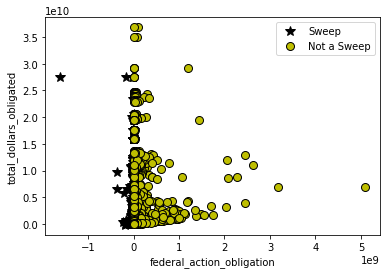

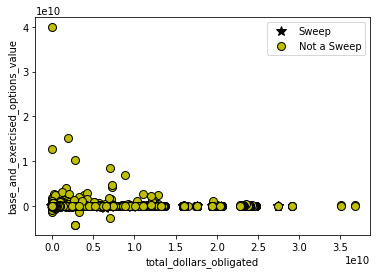

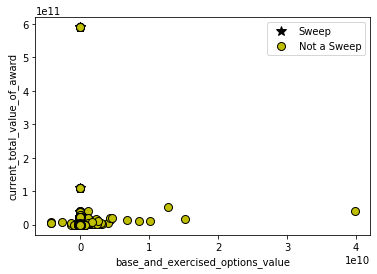

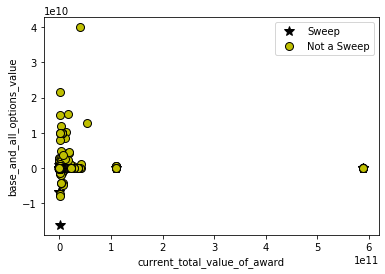

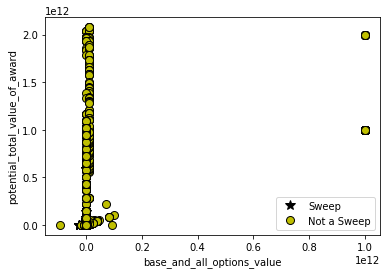

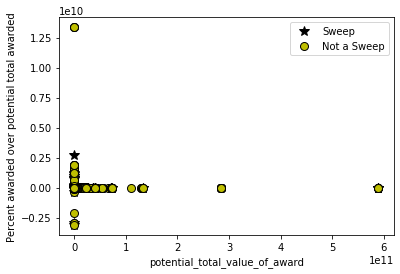

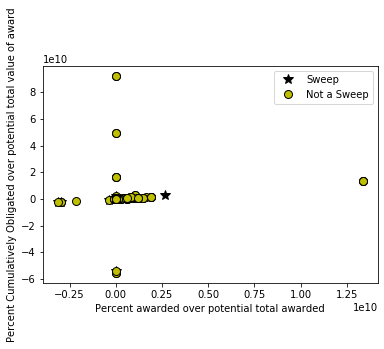

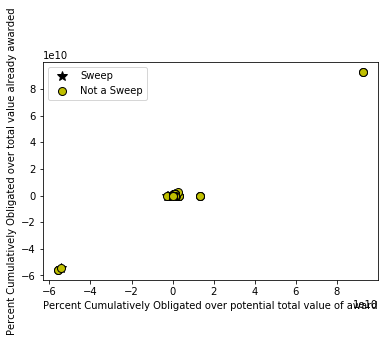

In [14]:
# This produces a scatter plot with each of the features, 
# but does not cover each permutation of features
# 10 min runtime, I should rethink this
features = len(df.columns) - 2
for i in range(features):
    fig = pyplot.figure()
    mask  = y == 1
    pyplot.plot(X[mask].iloc[:,i], X[mask].iloc[:, i+1], 'k*', lw=2, ms=10)
    pyplot.plot(X[~mask].iloc[:, i], X[~mask].iloc[:, i+1], 'ko', mfc='y', ms=8, mec='k', mew=1)
   
    # add axes labels
    pyplot.xlabel(df.columns[i])
    pyplot.ylabel(df.columns[i+1])
    pyplot.legend(['Sweep', 'Not a Sweep'])
    pass

In [15]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    temp = 1 + np.power(np.e,-z)
    g = 1 / temp
    

    return g

In [16]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [18]:
X

array([[ 1.00000000e+00, -2.24000000e+04,  0.00000000e+00, ...,
                    nan,             nan,             nan],
       [ 1.00000000e+00,  2.18872500e+04,  2.08501900e+04, ...,
         9.09523122e-01,  9.09523122e-01,  1.00000000e+00],
       [ 1.00000000e+00, -7.70286000e+03,  6.00395342e+06, ...,
         9.98730405e-01,  9.89578709e-01,  9.90836670e-01],
       ...,
       [ 1.00000000e+00,  1.25265690e+05,  1.25265690e+05, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -5.38000000e+02,  1.17424980e+05, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  5.48792000e+04, ...,
         9.99999818e-01,  9.99999818e-01,  1.00000000e+00]])